## import and load data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('dataset_crawler-google-places_2024-11-02_22-24-11-650.csv', encoding='utf-8')

C:\Users\xiyue\AppData\Local\Temp\ipykernel_19932\2680776536.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset_crawler-google-places_2024-11-02_22-24-11-650.csv', encoding='utf-8')


## category

In [17]:
# visualize all distinct category values

# Select columns categories/0 to categories/10
columns_of_interest = [f"categories/{i}" for i in range(11)]
columns_to_process = [col for col in columns_of_interest if col in df.columns]

# Flatten selected columns to find global distinct values across these columns
all_values = df[columns_to_process].values.flatten()
value_counts = pd.Series(all_values).value_counts()
#print(value_counts)
filtered_value_counts = value_counts[value_counts > 1]
pd.set_option('display.max_rows', None)
print(filtered_value_counts)

with open('filtered_value_counts.txt', 'w') as f:
    f.write(str(filtered_value_counts))

# plt.figure(figsize=(10, 6))
# filtered_value_counts.plot(kind='bar')
# plt.title('Distribution of Distinct Values')
# plt.xlabel('Distinct Values')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)
# plt.show()


Tourist attraction                  22664
Park                                 2893
Museum                               2202
Historical landmark                  1232
Hiking area                           951
Sehenswürdigkeit                      602
State park                            565
Nature preserve                       546
Memorial park                         403
Catholic church                       320
Castle                                309
Scenic spot                           251
Wildlife refuge                       236
Observation deck                      232
Dog park                              168
Animal park                           147
Church                                144
Evangelical church                    137
Local history museum                  126
Wildlife park                         121
Event venue                           120
Garden                                112
Zoo                                   109
Bridge                            

In [18]:
nature_keywords = ["Ecological", 'nature', 'natural', 'beach', 'farm', 'lake', 'observation', 'cave', 'garden', "camp", "forest"]
animal_keywords = ["wildlife", "zoo", "animal", "aquarium", "tier", "fishing", "dog", "bird", "Dude ranch"]
architect_keywords = ["rail", "Fortress", "schloss", "Cathedral", "schloss", "castle", "bridge", "city hall", "fountain", "bahnhof", "church", "festung", "athletic field", "City government office"]
history_keywords = ["Archaeological", "Lokalgeschichte", "Heritage", "histor", "memor", "fortress", "ethnographic", "monument", "festung", "Monument", "heritage", "schloss", "castle"]
culture_keywords = ["Concert", "Library", "Sculpture", "art", "music", "cultur", "kunst", "theater", "Event venue", "Winery", "gallery"]
hiking_keywords = ["hiking", "ski", "climb", "wander"]
park_keywords = ["park", "garden", "camp"]
museum_keywords = ["museum"]
religion_keywords = ["Pilgrimage", "church", "catholic", "kloster", "basilica", "chapel", "Evangelical", "Monastery", "Cathedral", "Religious"]
amusement_keywords = ["Bar", "spa", "Concert", "recreation","amusement", "club", "bar", "freizeit", "live music", "beach", "roller coaster", "Car racing track", "Off-road race track", "camp", "Event venue", "Playground"]
senic_keywords = ["senic", "places of interest", "observa", "Sehensw", "state", "national", "landmark", "Vista", "Sightseeing"]
botanical_keywords = ["botanical", "botanisch", "wildlife", "Arboretum"]
sport_keywords = ["sport", "ski", "climb", "swim", "Off-road race track", "Car racing track", "beach", "Skateboard"]

df['nature'] = 0
df['animal'] = 0
df['architect'] = 0
df['history'] = 0
df['culture'] = 0
df['hiking'] = 0
df['park'] = 0
df['museum'] = 0
df['religion'] = 0
df['amusement'] = 0
df['senic'] = 0
df['botanical'] = 0
df['sport'] = 0

category_cols = [f'categories/{i}' for i in range(10)]

df['nature'] = df[category_cols].apply(lambda row: any(keyword in str(row).lower() for keyword in nature_keywords), axis=1).astype(int)
df['animal'] = df[category_cols].apply(lambda row: any(keyword in str(row).lower() for keyword in animal_keywords), axis=1).astype(int)
df['architect'] = df[category_cols].apply(lambda row: any(keyword in str(row).lower() for keyword in architect_keywords), axis=1).astype(int)
df['history'] = df[category_cols].apply(lambda row: any(keyword in str(row).lower() for keyword in history_keywords), axis=1).astype(int)
df['culture'] = df[category_cols].apply(lambda row: any(keyword in str(row).lower() for keyword in culture_keywords), axis=1).astype(int)
df['hiking'] = df[category_cols].apply(lambda row: any(keyword in str(row).lower() for keyword in hiking_keywords), axis=1).astype(int)
df['park'] = df[category_cols].apply(lambda row: any(keyword in str(row).lower() for keyword in park_keywords), axis=1).astype(int)
df['museum'] = df[category_cols].apply(lambda row: any(keyword in str(row).lower() for keyword in museum_keywords), axis=1).astype(int)
df['religion'] = df[category_cols].apply(lambda row: any(keyword in str(row).lower() for keyword in religion_keywords), axis=1).astype(int)
df['amusement'] = df[category_cols].apply(lambda row: any(keyword in str(row).lower() for keyword in amusement_keywords), axis=1).astype(int)
df['senic'] = df[category_cols].apply(lambda row: any(keyword in str(row).lower() for keyword in senic_keywords), axis=1).astype(int)
df['botanical'] = df[category_cols].apply(lambda row: any(keyword in str(row).lower() for keyword in botanical_keywords), axis=1).astype(int)
df['sport'] = df[category_cols].apply(lambda row: any(keyword in str(row).lower() for keyword in sport_keywords), axis=1).astype(int)

df.to_csv('categoried_file.csv', encoding='utf-8', index=False)

In [19]:
df = pd.read_csv('categoried_file.csv', encoding='utf-8')
category_cols = ['nature', 'animal', 'architect', 'history', 'culture', 'hiking', 'park', 'museum', 'religion', 'amusement', 'senic', 'botanical', 'sport']
df = df[(df[category_cols] != 0).any(axis=1)]
df.to_csv('filtered_categoried.csv', encoding='utf-8', index=False)

C:\Users\xiyue\AppData\Local\Temp\ipykernel_19932\4179688858.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('categoried_file.csv', encoding='utf-8')


In [20]:
df = pd.read_csv('filtered_categoried.csv', encoding='utf-8')
city_counts = df['city'].value_counts()
cities_to_delete = city_counts[city_counts < 3].index
df = df[~df['city'].isin(cities_to_delete)]
df.to_csv("output.csv", encoding="utf-8", index=True)

## Eda

In [21]:
df = pd.read_csv('output.csv', encoding='utf-8')
num_cities = df['city'].nunique()
print("Number of distinct cities:", num_cities)

Number of distinct cities: 1200


In [22]:
total_rows = len(df)
print("Number of attractions:", total_rows+1)

Number of attractions: 7854


In [23]:
nonzero_nature_count = (df['nature'] != 0).sum()
nonzero_animal_count = (df['animal'] != 0).sum()
nonzero_architect_count = (df['architect'] != 0).sum()
nonzero_history_count = (df['history'] != 0).sum()
nonzero_culture_count = (df['culture'] != 0).sum()
nonzero_hiking_count = (df['hiking'] != 0).sum()
nonzero_park_count = (df['park'] != 0).sum()
nonzero_museum_count = (df['museum'] != 0).sum()
nonzero_religion_count = (df['religion'] != 0).sum()
nonzero_amusement_count = (df['amusement'] != 0).sum()
nonzero_senic_count = (df['senic'] != 0).sum()
nonzero_botanical_count = (df['botanical'] != 0).sum()
nonzero_sport_count = (df['sport'] != 0).sum()

print(f"Number of nature: {nonzero_nature_count}")
print(f"Number of animal: {nonzero_animal_count}")
print(f"Number of architect: {nonzero_architect_count}")
print(f"Number of history: {nonzero_history_count}")
print(f"Number of culture: {nonzero_culture_count}")
print(f"Number of hiking: {nonzero_hiking_count}")
print(f"Number of park: {nonzero_park_count}")
print(f"Number of museum: {nonzero_museum_count}")
print(f"Number of religion: {nonzero_religion_count}")
print(f"Number of amusement: {nonzero_amusement_count}")
print(f"Number of senic spot: {nonzero_senic_count}")
print(f"Number of botanical: {nonzero_botanical_count}")
print(f"Number of sport: {nonzero_sport_count}")

Number of nature: 933
Number of animal: 508
Number of architect: 854
Number of history: 1676
Number of culture: 315
Number of hiking: 653
Number of park: 3210
Number of museum: 1825
Number of religion: 505
Number of amusement: 298
Number of senic spot: 1722
Number of botanical: 324
Number of sport: 157


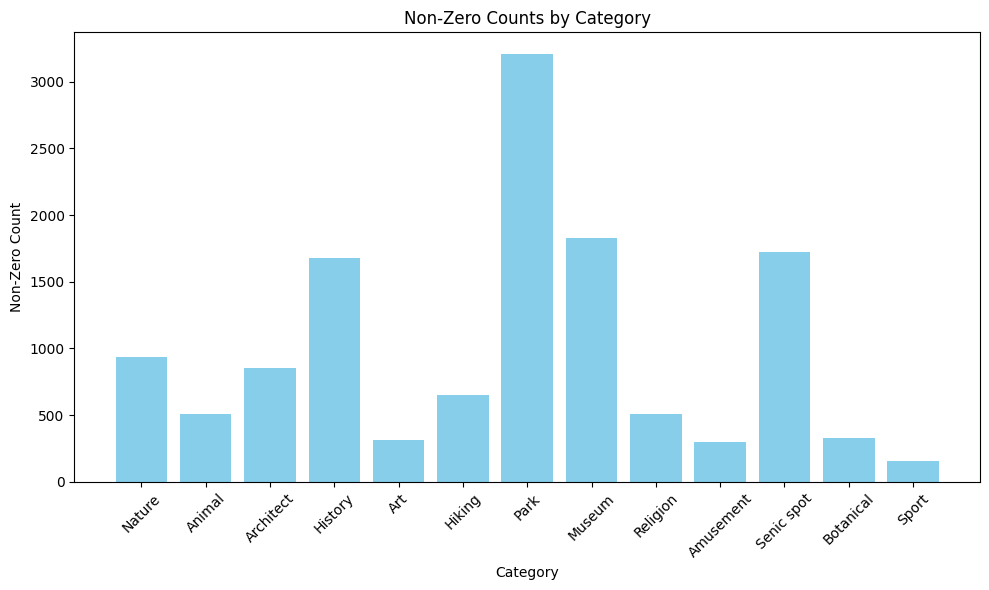

In [24]:
counts = {
    'Nature': nonzero_nature_count,
    'Animal': nonzero_animal_count,
    'Architect': nonzero_architect_count,
    'History': nonzero_history_count,
    'Art': nonzero_culture_count,
    'Hiking': nonzero_hiking_count,
    'Park': nonzero_park_count,
    'Museum': nonzero_museum_count,
    'Religion': nonzero_religion_count,
    'Amusement': nonzero_amusement_count,
    'Senic spot': nonzero_senic_count,
    'Botanical': nonzero_botanical_count,
    'Sport': nonzero_sport_count,
}

counts_df = pd.DataFrame(list(counts.items()), columns=['Category', 'Non-Zero Count'])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(counts_df['Category'], counts_df['Non-Zero Count'], color='skyblue')
plt.title('Non-Zero Counts by Category')
plt.xlabel('Category')
plt.ylabel('Non-Zero Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
plt.savefig('num_category.png', format='png')
plt.close()

## Visulization 

In [26]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [30]:
df = pd.read_csv('output.csv')

category_cols = ['nature', 'animal', 'architect', 'history', 'culture', 'hiking', 'park', 'museum', 'religion', 'amusement', 'senic', 'botanical', 'sport']
df_filtered = df[category_cols]

vectors = [row.values for _, row in df_filtered.iterrows()]
vectors = np.array(vectors)

print(vectors[:5])

[[1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]]


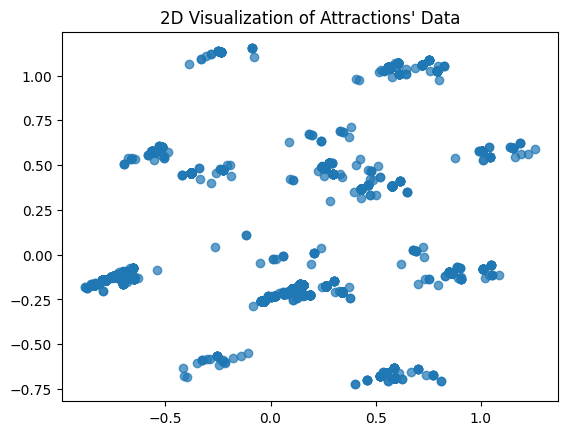

In [31]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(vectors)

plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.7)
plt.title('2D Visualization of Attractions\' Data')
plt.show()